In [1]:
import os

from IPython import display
import matplotlib.pyplot as plt
import librosa
import numpy as np
import pandas as pd
import re
import seaborn as sns
import wave
from tqdm import tqdm

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_io as tfio

In [2]:
yamnet_model = hub.load('https://tfhub.dev/google/yamnet/1')

In [3]:
def get_embeddings(filename, label):
    data, _ = librosa.load(filename, sr=16000, mono=True, res_type='kaiser_fast')
    _, embeddings, _ = yamnet_model(data)
    num_embeddings = tf.shape(embeddings)[0]
    return embeddings, tf.repeat(label, num_embeddings) 

# Building DataFrame

In [4]:
Crema_Path='../Datasets/Crema'
Ravdess_Path='../Datasets/Ravdess/'
Savee_Path='../Datasets/Savee/'
Tess_Path='../Datasets/Tess/'

In [5]:
crema=[]
for wav in os.listdir(Crema_Path):
    emotion=wav.partition(".wav")[0].split('_')
    if emotion[2]=='SAD':
        crema.append(('sad',Crema_Path+'/'+wav))
    elif emotion[2]=='ANG':
        crema.append(('angry',Crema_Path+'/'+wav))
    elif emotion[2]=='DIS':
        crema.append(('disgust',Crema_Path+'/'+wav))
    elif emotion[2]=='FEA':
        crema.append(('fear',Crema_Path+'/'+wav))
    elif emotion[2]=='HAP':
        crema.append(('happy',Crema_Path+'/'+wav))
    elif emotion[2]=='NEU':
        crema.append(('neutral',Crema_Path+'/'+wav))
    else:
        crema.append(('unknown',Crema_Path+'/'+wav))
Crema_df=pd.DataFrame.from_dict(crema)
Crema_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Crema_df.head()

,Emotion,File_Path
0,angry,../Datasets/Crema/1001_DFA_ANG_XX.wav
1,disgust,../Datasets/Crema/1001_DFA_DIS_XX.wav
2,fear,../Datasets/Crema/1001_DFA_FEA_XX.wav
3,happy,../Datasets/Crema/1001_DFA_HAP_XX.wav
4,neutral,../Datasets/Crema/1001_DFA_NEU_XX.wav


In [6]:
ravdess=[]
for directory in os.listdir(Ravdess_Path):
    actors=os.listdir(os.path.join(Ravdess_Path,directory))
    for wav in actors:
        emotion=wav.partition('.wav')[0].split('-')
        emotion_number=int(emotion[2])
        ravdess.append((emotion_number,os.path.join(Ravdess_Path,directory,wav)))
Ravdess_df=pd.DataFrame.from_dict(ravdess)
Ravdess_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Ravdess_df['Emotion'].replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'},inplace=True)
Ravdess_df.head()

,Emotion,File_Path
0,neutral,../Datasets/Ravdess/Actor_01\03-01-01-01-01-01...
1,neutral,../Datasets/Ravdess/Actor_01\03-01-01-01-01-02...
2,neutral,../Datasets/Ravdess/Actor_01\03-01-01-01-02-01...
3,neutral,../Datasets/Ravdess/Actor_01\03-01-01-01-02-02...
4,neutral,../Datasets/Ravdess/Actor_01\03-01-02-01-01-01...


In [7]:
savee=[]
for wav in os.listdir(Savee_Path):
    emo=wav.partition('.wav')[0].split('_')[1].replace(r'[0-9]','')
    emotion=re.split(r'[0-9]',emo)[0]
    if emotion=='a':
        savee.append(('angry',Savee_Path+'/'+wav))
    elif emotion=='d':
        savee.append(('disgust',Savee_Path+'/'+wav))
    elif emotion=='f':
        savee.append(('fear',Savee_Path+'/'+wav))
    elif emotion=='h':
        savee.append(('happy',Savee_Path+'/'+wav))
    elif emotion=='n':
        savee.append(('neutral',Savee_Path+'/'+wav))
    elif emotion=='sa':
        savee.append(('sad',Savee_Path+'/'+wav))
    elif emotion=='su':
        savee.append(('surprise',Savee_Path+'/'+wav))
Savee_df=pd.DataFrame.from_dict(savee)
Savee_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Savee_df.head()

,Emotion,File_Path
0,angry,../Datasets/Savee//DC_a01.wav
1,angry,../Datasets/Savee//DC_a02.wav
2,angry,../Datasets/Savee//DC_a03.wav
3,angry,../Datasets/Savee//DC_a04.wav
4,angry,../Datasets/Savee//DC_a05.wav


In [8]:
tess=[]
for directory in os.listdir(Tess_Path):
    for wav in os.listdir(os.path.join(Tess_Path,directory)):
        emotion=wav.partition('.wav')[0].split('_')
        if emotion[2]=='ps':
            tess.append(('surprise',os.path.join(Tess_Path,directory,wav)))
        else:
            tess.append((emotion[2],os.path.join(Tess_Path,directory,wav)))
Tess_df=pd.DataFrame.from_dict(tess)
Tess_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Tess_df.head()

,Emotion,File_Path
0,angry,../Datasets/Tess/OAF_angry\OAF_back_angry.wav
1,angry,../Datasets/Tess/OAF_angry\OAF_bar_angry.wav
2,angry,../Datasets/Tess/OAF_angry\OAF_base_angry.wav
3,angry,../Datasets/Tess/OAF_angry\OAF_bath_angry.wav
4,angry,../Datasets/Tess/OAF_angry\OAF_bean_angry.wav


In [46]:
# main_df=pd.concat([Crema_df,Ravdess_df,Savee_df,Tess_df],axis=0)
# main_df = Tess_df
# main_df = Ravdess_df
# main_df = Savee_df
main_df = Crema_df
main_df.shape

(7442, 2)

In [47]:
main_df.head(15)

,Emotion,File_Path
0,angry,../Datasets/Crema/1001_DFA_ANG_XX.wav
1,disgust,../Datasets/Crema/1001_DFA_DIS_XX.wav
2,fear,../Datasets/Crema/1001_DFA_FEA_XX.wav
3,happy,../Datasets/Crema/1001_DFA_HAP_XX.wav
4,neutral,../Datasets/Crema/1001_DFA_NEU_XX.wav
5,sad,../Datasets/Crema/1001_DFA_SAD_XX.wav
6,angry,../Datasets/Crema/1001_IEO_ANG_HI.wav
7,angry,../Datasets/Crema/1001_IEO_ANG_LO.wav
8,angry,../Datasets/Crema/1001_IEO_ANG_MD.wav
9,disgust,../Datasets/Crema/1001_IEO_DIS_HI.wav


In [35]:
# main_df = main_df[main_df['Emotion'] != 'surprise']

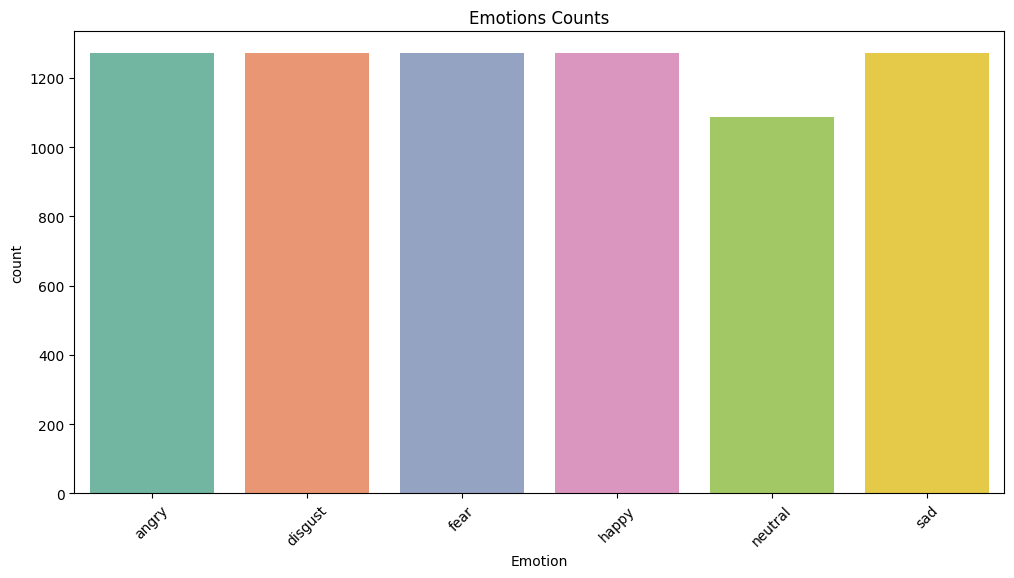

In [48]:
plt.figure(figsize=(12,6))
plt.title('Emotions Counts')
emotions=sns.countplot(x='Emotion',data=main_df,palette='Set2')
emotions.set_xticklabels(emotions.get_xticklabels(),rotation=45)
plt.show()

In [49]:
classes = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad']

main_df['Emotion'] = main_df['Emotion'].apply(lambda emotion: classes.index(emotion))

In [51]:
main_df.sample(10)

,Emotion,File_Path
3599,1,../Datasets/Crema/1045_IEO_DIS_LO.wav
7068,2,../Datasets/Crema/1087_ITS_FEA_XX.wav
5181,0,../Datasets/Crema/1064_ITS_ANG_XX.wav
2139,4,../Datasets/Crema/1027_IOM_NEU_XX.wav
1144,1,../Datasets/Crema/1015_IEO_DIS_HI.wav
3696,3,../Datasets/Crema/1046_IOM_HAP_XX.wav
2584,3,../Datasets/Crema/1032_TAI_HAP_XX.wav
4580,0,../Datasets/Crema/1057_IEO_ANG_LO.wav
2700,2,../Datasets/Crema/1034_IEO_FEA_LO.wav
5645,0,../Datasets/Crema/1070_IEO_ANG_HI.wav


In [52]:
main_df.shape

(7442, 2)

# Getting Embeddings

In [16]:
# rs = main_df.sample()
# rand_file = rs['File_Path'].values[0]
# rand_emo = classes[rs['Emotion'].values[0]]
# print(rand_file, rand_emo)

# testing_wav_data = load_wav_16k_mono(rand_file)

# _ = plt.plot(testing_wav_data)

# # Play the audio file.
# display.Audio(testing_wav_data,rate=16000)

In [53]:
X = []
y = []

for _, row in tqdm(main_df.iterrows(), total=main_df.shape[0]):
    filename = row['File_Path']
    emo = row['Emotion']
    embs, labels = get_embeddings(filename, emo)
    assert(len(embs) == len(labels))
    for i in range(embs.shape[0]):
        X.append(embs[i])
        y.append(labels[i])

X = np.array(X)
y = np.array(y)

100%|██████████| 7442/7442 [04:16<00:00, 28.97it/s]


In [54]:
X.shape, y.shape

((35552, 1024), (35552,))

In [55]:
X.dtype, y.dtype

(dtype('float32'), dtype('int32'))

In [56]:
np.save('./features/numpy/Crema_X.npy', X)
np.save('./features/numpy/Crema_y.npy', y)

In [57]:
X[0], y[0]

(array([1.3011403e-01, 6.8549949e-01, 5.7687894e-02, ..., 2.8575957e-04,
        1.7389754e-03, 0.0000000e+00], dtype=float32),
 0)

In [87]:
from sklearn.model_selection import train_test_split

def split_df(data, label, ratio_train=0.7, ratio_val=0.15, ratio_test=0.15):
    if ratio_train + ratio_val + ratio_test != 1:
        raise ValueError('Train, validation and test ratios must sum to 1')

    # Produces test split.
    remaining_data,  test_data, remaining_label, test_label = train_test_split(
        data, label, test_size=ratio_test, stratify=label, shuffle=True)

    # Adjusts val ratio, w.r.t. remaining dataset.
    ratio_remaining = 1 - ratio_test
    ratio_val_adjusted = ratio_val / ratio_remaining

    # Produces train and val splits.
    train_data, val_data, train_label, val_label = train_test_split(
        remaining_data, remaining_label,
        test_size=ratio_val_adjusted,
        stratify=remaining_label, shuffle=True
    )
    
    return train_data, train_label, val_data, val_label, test_data, test_label

In [88]:
train_data, train_label, val_data, val_label, test_data, test_label = split_df(X, y)

In [89]:
train_data.shape, train_label.shape, val_data.shape, val_label.shape, test_data.shape, test_label.shape

((39806, 1024), (39806,), (8530, 1024), (8530,), (8531, 1024), (8531,))

In [ ]:
my_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1024), dtype=tf.float32),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(len(classes), activation='softmax')
], name='shitty_model')

my_model.summary()

In [94]:
my_model.compile(loss='sparse_categorical_crossentropy',
                 optimizer="adam",
                 metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=3,
                                            restore_best_weights=True)

In [95]:
history = my_model.fit(
        x=train_data,
        y=train_label,
        epochs=20,
        validation_data=(val_data, val_label),
        batch_size=32,
        # callbacks=callback
)

Epoch 1/20
1244/1244 [==============================] - 7s 5ms/step - loss: 1.5394 - accuracy: 0.3736 - val_loss: 1.4677 - val_accuracy: 0.3947
Epoch 2/20
1244/1244 [==============================] - 6s 5ms/step - loss: 1.4144 - accuracy: 0.4249 - val_loss: 1.4030 - val_accuracy: 0.4293
Epoch 3/20
1244/1244 [==============================] - 6s 5ms/step - loss: 1.3662 - accuracy: 0.4485 - val_loss: 1.4031 - val_accuracy: 0.4266
Epoch 4/20
1244/1244 [==============================] - 6s 5ms/step - loss: 1.3292 - accuracy: 0.4638 - val_loss: 1.3774 - val_accuracy: 0.4406
Epoch 5/20
1244/1244 [==============================] - 6s 5ms/step - loss: 1.2948 - accuracy: 0.4779 - val_loss: 1.3817 - val_accuracy: 0.4271
Epoch 6/20
1244/1244 [==============================] - 6s 5ms/step - loss: 1.2637 - accuracy: 0.4952 - val_loss: 1.3716 - val_accuracy: 0.4404
Epoch 7/20
1244/1244 [==============================] - 6s 5ms/step - loss: 1.2349 - accuracy: 0.5065 - val_loss: 1.3623 - val_accuracy:

In [96]:
loss, accuracy = my_model.evaluate(test_data, test_label)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

267/267 [==============================] - 1s 2ms/step - loss: 1.6978 - accuracy: 0.4365
Loss:  1.697813630104065
Accuracy:  0.4365256130695343


In [ ]:
# scores, embeddings, spectrogram = yamnet_model(testing_wav_data)
# result = my_model(embeddings).numpy()

# inferred_class = classes[result.mean(axis=0).argmax()]
# print(f'The main sound is: {inferred_class}')